<a href="https://colab.research.google.com/github/jjschueder/7331DataMiningNotebooks/blob/master/Mini-Project%20SVMLR%20Classification/(featureImportanceupdate)msds7331_mini_clark_schueder_vela_washburn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project: SVM & LR Classification - project guidelines
You are to perform predictive analysis (classification) upon a data set: model the dataset using
methods we have discussed in class: logistic regression & support vector machines and making
conclusions from the analysis. Follow the CRISP-DM framework in your analysis (you are not
performing all of the CRISP-DM outline, only the portions relevant to the grading rubric outlined
below). This report is worth 10% of the final grade. You may complete this assignment in teams
of as many as three people.
Write a report covering all the steps of the project. The format of the document can be PDF,
*.ipynb, or HTML. You can write the report in whatever format you like, but it is easiest to turn in
the rendered Jupyter notebook. The results should be reproducible using your report. Please
carefully describe every assumption and every step in your report.
A note on grading: A common mistake I see in this lab is not investigating different input
parameters for each model. Try a number of parameter combinations and discuss how the model changed. 



# Mini-Project: SVM & LR Classification - project requirements
*   [50 points] Logistic Regression and Support Vector Machine models
   * Create logistic regression model and support vector machine model for classification task in dataset.
      * Logistic regression - fulfilled w/ M1, M2, M5, M6
      * SVM - fulfilled w/ M3, M4
   * Assess how well each model performs (use 80/20 training/testing split of our data)
      * Fulfilled w/ prediction section of each model
   * Adjust parameters of the models to make them more accurate
      * Logistic Regression - fulfilled w/ M2
      * SVM - fulled w/ M4
   * If dataset size requires stochastic gradient descent, then linear kernel only is fine - meaning: SGDClassifier can be used to optimize logistic regression and linear support vector machines.  For many problems, SGD will be required in order to train the SVM model in reasonable timeframe
      * Logistic Regression - fulfilled w/ M5, M6
      * SVM - fulfilled w/ M7
*   [10 points] Model advantages
   * Discuss advantages of each model for each classfication task
      * Fulfilled in Evaluation-->Model Advantages
   * Does type of model offer superior performance over another in terms of prediction accuracy
      * Fulfilled in Evaluation-->Model Advantages Conclusion
   * Does type of model offer superior performance over another in terms training time or efficiency
      * Fulfilled in the Evaluation-->Model Advantages (each type)
*   [30 points] Feature importance
   * Use the weights from logistic regression to interpret the importance of different features for the classification task in detail
      * Fulfilled in Evaluation-->Feature Importance
   * Why do we think some variables are more important than others
      * Fulfilled in Evaluation-->Feature Importance
*   [10 points] Support Vector Analysis
   * Looking at the chosen support vectors for the classfication task, answer the following:
      * Do these provide any insight into the data? Explain
      * If stochastic gradient descent used; therefore, did not explicitlity solve for support vectors
         * Subsample the data to train the SVC model
            * SVM - fulfilled in M7
         * Analyze support vectors from subsampled dataset
            * Fulfilled in Evaluation-->Support Vector Analysis

#Mini-Project: SVM & LR Classification

##Team

* Joseph Schueder
* Armando Vela
* Daniel Clark
* Jeff Washburn

##Business Understanding

Introduction - The Iowa Liquor Sales dataset is an API from Google’s Bigquery which contains the wholesale purchases by retail stores in the Iowa area.  The dataset includes the spirit purchase details by product, date of purchase, and location the item was purchased from an Iowa Class “E” liquor license holder (retail stores). The time frame of this data starts from January 1, 2012 through December 31, 2019. As part of the study commissioned by the Iowa Department of Commerce, all alcoholic sales within the state were logged into the Department system, and in turn, published as open data by the State of Iowa. The dataset contains detail on the name, product, quantity and location of the individual container or package sale between the wholesaler (vendor) and the retailer.



###1.   Set Objectives


> Having found that Iowa is a prime market for different kind of liquor sales, we want to investigate the current sales trends between Whiskey Sales vs Non-Whiskey sales.  We would like to classify the liquor sales based on if it will be a Whiskey sale or not.  


###2.   Product Project Plan

> To meet our goals, we will build upon the dataset we used in our initial analysis to focus in on the Whiskey and Non-Whiskey sales.  We will use the same 400k rows from the last analysis and in addition further cleansing was done to 1 hot encode some of the categorical features, which will be our starting point on the data.

###3.   Business Success Criteria

> For our classification models, we will consider our model successful if we can classify the presence of Whiskey vs Non-Whiskey in the sales tranaction with an accuracy of 89% or higher.  We will use cross-validaton using a split of 80% of the data for training and 20% of the data for testing to evaulate the performance of our classifiers.  We will build 2 different classification models - 1) using logistic regression, and 2) support vector machines (SVMs).  Since our data set is so large, we will also optimize both classification models using stochastic gradient descent using the linear kernel.  This will help train our models in a reasonable timeframe





## Data Understanding

The initial data set was 4.63GB with 17.7 million rows.  We subsetted that down to 400k rows using a random set of data from the 2019 sales data.  This work was done in our initial processing from earlier.

So taking our initial processing that was done from previous work, we further refined the 400k dataset by one-hot encoding the categorical features for sales month, liquor categories, and the stores.  The stores will not be used in this analysis; however, it was still one-hot encoded for future analysis

It's also worth noting, that we used the log transformed values for sales dollars, cost per liter, state bottle cost and volume sold in liters along with the liquor catogory to focus on our classification



## Data Preparation

In [0]:
# import necessary packages for complete analysis
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.linear_model import SGDClassifier

### Load Dataset

In [0]:
# The data was produced from the Iowa Alcohol Dataset 2019 year data.  The total data set size has over 17 million rows.  We took
# a subet of that data, 400,000 rows

# The 400k rows were cleansed and transformed lab1 and exported as a csv to github for use here.
# source python notebook: https://github.com/jjschueder/7331DataMiningNotebooks/blob/master/lab1/msds7331_clark_schueder_vela_washburn.ipynb

# Further cleansing was done to 1 hot encode some of the categorical features, which is what we are reading in here.  Still using 400k rows of data

# read csv from github directly
url_dataset = 'https://raw.githubusercontent.com/jjschueder/7331DataMiningNotebooks/master/Live%20Assignments/df1hotmerge2.csv'
data = pd.read_csv(url_dataset) #full dataset of 400k rows
#data = pd.read_csv(url_dataset, nrows=100000) #smaller subset of data of nrows

###Columns and Descriptors

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 68 columns):
Unnamed: 0                  400000 non-null int64
pack                        400000 non-null int64
bottle_volume_ml            400000 non-null int64
state_bottle_cost           400000 non-null float64
state_bottle_retail         400000 non-null float64
bottles_sold                400000 non-null int64
sale_dollars                400000 non-null float64
volume_sold_liters          400000 non-null float64
volume_sold_gallons         400000 non-null float64
counter                     400000 non-null int64
liquor_category             400000 non-null object
store_parent                400000 non-null object
month                       400000 non-null object
year                        400000 non-null int64
monthyear                   400000 non-null object
liquor_category_AMARETTO    400000 non-null int64
liquor_category_BRANDY      400000 non-null int64
liquor_category_GIN      

In [4]:
# Validate dataset
print(data.shape)
print(list(data.columns))
data

(400000, 68)
['Unnamed: 0', 'pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons', 'counter', 'liquor_category', 'store_parent', 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'liquor_category_WHISKY', 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'year_2019', 'monthyear_Apr-2019', 'monthyear_Aug-2019', 'monthyear_De

,Unnamed: 0,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,counter,liquor_category,store_parent,month,year,monthyear,liquor_category_AMARETTO,liquor_category_BRANDY,liquor_category_GIN,liquor_category_LIQUEUR,liquor_category_Other,liquor_category_RUM,liquor_category_SCHNAPPS,liquor_category_TEQUILA,liquor_category_VODKA,liquor_category_WHISKY,store_parent_CVS,store_parent_Caseys,store_parent_Hy-Vee,store_parent_Kum&Go,store_parent_Other,store_parent_QuikTrip,store_parent_SamsClub,store_parent_SmokingJoes,store_parent_Target,store_parent_Wal-Mart,store_parent_Walgreens,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,year_2019,monthyear_Apr-2019,monthyear_Aug-2019,monthyear_Dec-2019,monthyear_Feb-2019,monthyear_Jan-2019,monthyear_Jul-2019,monthyear_Jun-2019,monthyear_Mar-2019,monthyear_May-2019,monthyear_Nov-2019,monthyear_Oct-2019,monthyear_Sep-2019,sale_dollars_trans,cost_per_liter,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,grossmargin
0,0,20,375,3.85,5.78,20,115.60,7.50,1.98,1,Other,Other,Nov,2019,Nov-19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4.750136,15.413333,2.735233,1.348073,2.995732,2.014903,0.333910
1,1,8,50,8.75,13.13,1,13.13,0.05,0.01,1,Other,Other,Nov,2019,Nov-19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2.574900,262.600000,5.570632,2.169054,0.000000,-2.995732,0.333587
2,2,12,1000,16.50,24.75,6,148.50,6.00,1.58,1,GIN,Hy-Vee,May,2019,May-19,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,5.000585,24.750000,3.208825,2.803360,1.791759,1.791759,0.333333
3,3,6,750,21.17,31.76,24,762.24,18.00,4.75,1,WHISKY,Hy-Vee,Nov,2019,Nov-19,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6.636261,42.346667,3.745890,3.052585,3.178054,2.890372,0.333438
4,4,6,1750,9.31,13.97,12,167.64,21.00,5.54,1,Other,Hy-Vee,Nov,2019,Nov-19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5.121819,7.982857,2.077296,2.231089,2.484907,3.044522,0.333572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,399995,12,750,7.49,11.24,12,134.88,9.00,2.37,1,VODKA,Hy-Vee,Jul,2019,Jul-19,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4.904385,14.986667,2.707161,2.013569,2.484907,2.197225,0.333630
399996,399996,12,750,7.49,11.24,12,134.88,9.00,2.37,1,VODKA,Hy-Vee,Jul,2019,Jul-19,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4.904385,14.986667,2.707161,2.013569,2.484907,2.197225,0.333630
399997,399997,12,750,7.49,11.24,12,134.88,9.00,2.37,1,VODKA,Wal-Mart,Apr,2019,Apr-19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,4.904385,14.986667,2.707161,2.013569,2.484907,2.197225,0.333630
399998,399998,12,750,7.49,11.24,12,134.88,9.00,2.37,1,VODKA,Wal-Mart,Jul,2019,Jul-19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4.904385,14.986667,2.707161,2.013569,2.484907,2.197225,0.333630


###Remove unwanted columns

In [5]:
# Remove unwanted columns, which include all the specific liquor categories, 
# except for liquor_category_WHISKY since that is what we want to classify on, along
# with all the store_ attributes
"""
cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 
 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 
 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 
 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
"""
to_keep=['sale_dollars_trans', 'cost_per_liter_trans',
      'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans','pack', 'bottle_volume_ml',
       'liquor_category_WHISKY']
data_final=data[to_keep]
data_final.columns.values

array(['sale_dollars_trans', 'cost_per_liter_trans',
       'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans', 'pack', 'bottle_volume_ml',
       'liquor_category_WHISKY'], dtype=object)

###Simple Statistics

In [6]:
data_final.describe()

,sale_dollars_trans,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,pack,bottle_volume_ml,liquor_category_WHISKY
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,4.342939,2.766402,2.090235,1.847176,1.576537,11.950140,960.109795,0.104387
std,1.061412,0.828823,0.707591,1.078662,1.352197,8.382596,557.811485,0.305763
min,0.292670,0.916291,-0.116534,0.000000,-3.912023,1.000000,25.000000,0.000000
25%,3.727619,2.090805,1.690096,1.098612,0.810930,6.000000,750.000000,0.000000
50%,4.319087,2.736221,2.111425,1.791759,2.197225,12.000000,750.000000,0.000000
75%,5.030046,3.097687,2.539237,2.484907,2.351375,12.000000,1750.000000,0.000000
max,10.823499,7.495542,5.926899,8.237479,8.797095,48.000000,6000.000000,1.000000


In [7]:
data_final.info

<bound method DataFrame.info of         sale_dollars_trans  ...  liquor_category_WHISKY
0                 4.750136  ...                       0
1                 2.574900  ...                       0
2                 5.000585  ...                       0
3                 6.636261  ...                       1
4                 5.121819  ...                       0
...                    ...  ...                     ...
399995            4.904385  ...                       0
399996            4.904385  ...                       0
399997            4.904385  ...                       0
399998            4.904385  ...                       0
399999            4.904385  ...                       0

[400000 rows x 8 columns]>

In [8]:
# From the entire dataset (400k rows) take a look at what our Whiskey vs Non-Whiskey distribution looks like
#data = data.drop(columns = ['Unnamed: 0'])
count_not_whiskey = len(data_final[data_final['liquor_category_WHISKY']==0])
count_whiskey = len(data_final[data_final['liquor_category_WHISKY']==1])
pct_of_no_whiskey = count_not_whiskey/(count_not_whiskey+count_whiskey)
print("Percentage of not whiskey is", pct_of_no_whiskey*100)
pct_of_whiskey = count_whiskey/(count_not_whiskey+count_whiskey)
print("Percentage of whiskey", pct_of_whiskey*100)

Percentage of not whiskey is 89.56125
Percentage of whiskey 10.438749999999999


###Locate Features and Label

Our features will be everything that isn't the liquor_category_WHISKY

And our label, what we are trying to classify on, will be the liquor_category_WHISKY

In [0]:
# X will be our features
X = data_final.loc[:, data_final.columns != 'liquor_category_WHISKY']

# y will be our label, what we are trying to classify
y = data_final.loc[:, data_final.columns == 'liquor_category_WHISKY']

In [10]:
X.head()

,sale_dollars_trans,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,pack,bottle_volume_ml
0,4.750136,2.735233,1.348073,2.995732,2.014903,20,375
1,2.574900,5.570632,2.169054,0.000000,-2.995732,8,50
2,5.000585,3.208825,2.803360,1.791759,1.791759,12,1000
3,6.636261,3.745890,3.052585,3.178054,2.890372,6,750
4,5.121819,2.077296,2.231089,2.484907,3.044522,6,1750


In [11]:
y.head

<bound method NDFrame.head of         liquor_category_WHISKY
0                            0
1                            0
2                            0
3                            1
4                            0
...                        ...
399995                       0
399996                       0
399997                       0
399998                       0
399999                       0

[400000 rows x 1 columns]>

## Modeling

###80/20 training/testing split
<a id='datasplit'></a> 

Split our dataset into train/test with 80% of the data used for training and 20% of the data used to test the model

In [12]:
# Create the training/testing datasets

# This works well for M1, M2, M5, M6, M7 on full dataset to have models train in decent
# amount of time (no model takes longer than 3 mins)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# This works well for M3, M4 (SVM models) - need a smaller train size to get model to train
# in decent amount of time
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X, y, test_size=0.99, random_state=0)

columns = X_train.columns

print('Full dataset shape')
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_train shape: ', y_train.shape)
print('Y_test shape: ', y_test.shape)

print('\nSubset of dataset for SVM models')
print('X_train_svc shape: ', X_train_svc.shape)
print('X_test_svc shape: ', X_test_svc.shape)
print('Y_train_svc shape: ', y_train_svc.shape)
print('Y_test_svc shape: ', y_test_svc.shape)

Full dataset shape
X_train shape:  (320000, 7)
X_test shape:  (80000, 7)
Y_train shape:  (320000, 1)
Y_test shape:  (80000, 1)

Subset of dataset for SVM models
X_train_svc shape:  (4000, 7)
X_test_svc shape:  (396000, 7)
Y_train_svc shape:  (4000, 1)
Y_test_svc shape:  (396000, 1)


###M1-Logistic Regression Model
<a id='m1'></a>
Create a logistic regression model with all defaults used to the model, except for max_iter as we were seeing convergence warnings.  The default max_iter setting according to documentation is set to 100, so we increased to 500 and that prevented the warnings from showing up.

In [13]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
# seeing message 'lbfgs failed to converge. Increase the number of iterations'
# https://stats.stackexchange.com/questions/184017/how-to-fix-non-convergence-in-logisticregressioncv
# increased max_iter to 500 
#simplelogisticRegr = LogisticRegression()# class_weight = 'balanced')
simplelogisticRegr = LogisticRegression(max_iter=500)# class_weight = 'balanced')


# fit (train) the model
# was seing an error about column-vector y was passed when 1d array expected
# fix: https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
#simplelogisticRegr.fit(X_train, y_train)
simplelogisticRegr.fit(X_train, y_train.values.ravel())

coef = simplelogisticRegr.coef_[0]
print ('Coefficients: ', '\n', coef)

classes = simplelogisticRegr.classes_[0]
print()
print ('Classes: ', '\n', classes)

intercept = simplelogisticRegr.intercept_[0]
print()
print ('Intercept: ', '\n', intercept)

params =simplelogisticRegr.get_params(deep=True)
print()
print ('Params: ', '\n', params)


Coefficients:  
 [ 8.16007331e-02 -8.20911453e-01  4.47644096e+00 -1.14928131e+00
  9.02512175e-01  9.68893944e-02 -3.71429137e-03]

Classes:  
 0

Intercept:  
 -8.016332861549207

Params:  
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


#### M1-Predictions (92% full ds)
<a id='m1_predict'></a>

In [14]:
# Do predictions
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

# Use score method to get accuracy of model
score = simplelogisticRegr.score(X_test, y_test)
print('Accuracy:\n', score)

# Predictions
predictions = simplelogisticRegr.predict(X_test)
print('\nConfusion Matrix:\n', confusion_matrix(y_test, predictions))

# Classification Report

###M1-Evaluation
print('\nClassification Report:\n', classification_report(y_test, predictions))

Accuracy:
 0.9194375

Confusion Matrix:
 [[70559  1118]
 [ 5327  2996]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     71677
           1       0.73      0.36      0.48      8323

    accuracy                           0.92     80000
   macro avg       0.83      0.67      0.72     80000
weighted avg       0.91      0.92      0.91     80000



####M1-Evaluation
We ran a "simple" logistic regression model using the default hyperparameters of C=1.0, no weighting of the classes and with a ridge regression penalty. 

As a result, our model achieved 92% accuracy which is a bit higher than the accuracy we would achieve if we were to guess randomly based on the distribution of whiskeys vs non whiskeys. From here, we can use a grid search procedure to tune our hyperparameters to improve our accuracy score. 



### M2-Logistic Regression Model w/ Gridsearch for Hyperparameter Tuning
<a id='m2'></a>

Find scalings for each column that make this zero mean and unit std the line of code above only looks at training data to get mean and std and we can use it to transform new feature data

In [0]:
# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) 

# apply to training on full dataset
X_train_scaled = scl_obj.transform(X_train) 
X_test_scaled = scl_obj.transform(X_test)

# do scaling on the subset of data used for svm models
scl_obj_svc = StandardScaler()
scl_obj_svc.fit(X_train_svc) 

# apply to training on full dataset
X_train_svc_scaled = scl_obj_svc.transform(X_train_svc) 
X_test_svc_scaled = scl_obj_svc.transform(X_test_svc)

Use GridSearch and CrossValidation to find the best logistic regression hyperparameter combination

In [16]:
#Logisitic regression 10-fold cross-validation 

#Divide data into test and training splits
# full dataset w/ splits=5, test_size=.5 takes over 5 mins to get to just 196 tasks (out of 600 fits), stopped process, taking too long
#cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

# full dataset w/ splits=2, test_size=.8 takes 3 mins
cv = ShuffleSplit(n_splits=2, test_size=0.8, random_state=0)

regEstimator = LogisticRegression()


parameters = { 'penalty':['l2', 'l1', 'elasticnet']
              ,'C': [0.001, 1, 10, 100]
              ,'class_weight': ['balanced', 'none']
              ,'random_state': [0]
              ,'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
              ,'max_iter':[100]
             }

#Create a grid search object using the  

regGridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=-1 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_train_scaled, y_train.values.ravel())

Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.9min finished


GridSearchCV(cv=ShuffleSplit(n_splits=2, random_state=0, test_size=0.8, train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 1, 10, 100],
                         'class_weight': ['balanced', 'none'],
                         'max_iter': [100],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'random_state': [0],
  

Show the best estimators from GridSearch

In [20]:
#Diplay the top model parameters
regGridSearch.best_estimator_

LogisticRegression(C=1, class_weight='none', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

After running our grid search, we found that the ideal model uses a C=0.001 which is different from our default model of C=1.0. Otherwise, the other parameters remained the same. 


---


####M2-Predictions (92% full ds)
<a id='m2_predict'></a>


Let's see how this does with our accuracy score. 

In [21]:
type(regGridSearch)

gridresults = pd.DataFrame(regGridSearch.cv_results_)

columns = ['param_solver','param_C', 'param_max_iter', 'class_weight', 'param_penalty', 'mean_test_score', 'rank_test_score']
gridresults = pd.DataFrame(gridresults, columns=columns)

gridresults.sort_values(by=['rank_test_score'], ascending=True).head(20)

y_hat = regGridSearch.predict(X_test_scaled) # get test set precitions

# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
print('Accuracy:\n', acc)

# Confustion matrix
conf = mt.confusion_matrix(y_test, y_hat)
print('\nConfusion Matrix:\n', conf)

# Get predictions and print the classification report
predictions2 = regGridSearch.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print('\nClassification Report:\n', classification_report(y_test, y_hat))

Accuracy:
 0.9191875

Confusion Matrix:
 [[70559  1118]
 [ 5347  2976]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     71677
           1       0.73      0.36      0.48      8323

    accuracy                           0.92     80000
   macro avg       0.83      0.67      0.72     80000
weighted avg       0.91      0.92      0.91     80000



####M2-Evaluation
After running a grid search to uncover the top performing logistic regression hyperparameter combination, we are seeing that the accuracy score is close to our simple logistic regression model, however, it did come in close to the same. 

The Simple Logistic Regression model was the winner with a C=1 which is less regularization than the grid search that called for a stronger regularization at C = 0.001. 

---


ROC Curves and AUC in Python
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

Since our accuracy was better with our logistic regression model, we will use this in building an ROC curve to show how our model is performing. 




In [0]:
# predict probabilities
lr_probs = simplelogisticRegr.predict_proba(X_test_scaled)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

In [0]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

Looking at our true positive rate compared to false-positive rate, with the diagonal line representing a 50% false-positive rate, we can see that our model is producing more True positives than false-positives.



---

Running a Precision/ Recall line plot

In [0]:
ywhiskcnt = y_test.apply(pd.value_counts)
ycnt = ywhiskcnt.loc[1:1, :]

In [0]:
# predict probabilities
lr_probs = simplelogisticRegr.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = regGridSearch.predict(X_test_scaled)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
ywhiskcnt = y_test.apply(pd.value_counts)
ycnt = ywhiskcnt.loc[1:1, :]
no_skill = ycnt.values[0] / len(y_test)
#no_skill = len(y_test[y_test==1]) / len(y_test)
no_skill
#no_skill = 0.2
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

From the precision/ recall line plot above, we can see that our model tends to lose precision as we get a higher recall, with the bottoming out of 0.5 precision and 0.2 being the point of spiking the performance. 

So essentially, it is saying that our model is better at predicting the correct line items that were whiskeys than correctly discerning between whiskeys and non whiskeys. 

### M3-SVM Model
<a id='m3'></a>

In [0]:
%%time

#possibility to scale it?
from sklearn.svm import LinearSVC
from sklearn import preprocessing
X_train_svc_scaled 
X_test_svc_scaled 
#X_train = preprocessing.scale(X_train_svc)
#X_test = preprocessing.scale(X_test_svc)

# all parameters not specified are set to their defaults
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
from sklearn.svm import SVC
#svclassifier = SVC(kernel='poly', degree=8)
#svclassifier = SVC(kernel='rbf')
#svclassifier = SVC(kernel='linear', C = 1000, random_state=0)
#svclassifier = LinearSVC(C=100)

# still getting ConvergenceWarning w/ max_iter=100000 w/ full dataset
# C=100, max_iter=100000 taking over up to an hour to run on full dataset
# In the 80/20 training/testing split, use the smaller train set of only 1% and max_iter=10000
# takes less than 2 mins to complete.  Keep seeing convergance warnings on values less than 100000
# with more than 4000 rows of training data
svclassifier = LinearSVC(C=100, max_iter=100000) 

# Fit (train) the model
#model = svclassifier.fit(X_train_svc_scaled,  y_train_svc)
model = svclassifier.fit(X_train_svc_scaled,  y_train_svc.values.ravel())
model

####M3-Predictions (92% sub ds)
<a id='m3_predict'></a>

In [0]:
# Returns a NumPy Array
predictions_svc = svclassifier.predict(X_test_svc_scaled)
from sklearn.metrics import classification_report, confusion_matrix

acc = mt.accuracy_score(y_test_svc,predictions_svc)
print("Accuracy:\n", acc )

print("\nConfusion matrix:")
print(confusion_matrix(y_test_svc, predictions_svc))

print("\nClassification report:")
print(classification_report(y_test_svc, predictions_svc))


####M3-Evaluation
For our Support Vector Machine, we were able to derive an 92% Accuracy with a precision of 92% and Recall of 99%. 


---


Now, will look at the weights to determine feature importance



In [0]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(svclassifier.coef_)
weights = pd.Series(svclassifier.coef_[0],index=X.columns)
weights.plot(kind='bar')

Looking at the key values associated with driving the prediction classifier of whiskey vs non whiskey, we can see that the state bottle cost and bottles sold are the key factor in driving performance, followed by the sale amount of the transation which has a negative relationship to whether or not a sale was a whiskey.

###M4-SVM Model w/ Hyperparameter Tuning
<a id='m4'></a>

Create a Support Vector Machine model.  Find scalings for each column that make this zero mean and standard deviation.   Will scale at the training data to get mean and standard deviation and can use it to transform new feature data

In [0]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train_svc) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

# apply to training
X_train_svc_scaled = scl_obj.transform(X_train_svc) 
X_test_svc_scaled = scl_obj.transform(X_test_svc)

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
#model3 = svm_clf.fit(X_train_scaled, y_train)  # train object
model3 = svm_clf.fit(X_train_svc_scaled, y_train_svc.values.ravel()) 
model3

####M4-Predictions (92% sub ds)
<a id='m4_predict'></a>

In [0]:
# get test set precitions
y_hat_svc = svm_clf.predict(X_test_svc_scaled) 

acc_svc = mt.accuracy_score(y_test_svc,y_hat_svc)
conf_svc = mt.confusion_matrix(y_test_svc,y_hat_svc)
print('Accuracy:\n', acc_svc )

print("\nConfusion matrix:")
print(conf_svc)

print("\nClassification report:")
print(classification_report(y_test_svc,y_hat_svc))

####M4-Evaluation
With SVM Model with Hyperparameter Tuning, we attain the highest accuracy score with over 92%, with the highest precision, recall and F1 Score achieved with our model. The SVM CLF will be the model we chose in our interpretation. 

In [0]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

So the analysis here is basically telling us what the original statistics of the data looked like, and also what the statistics of the support vectors looked like. We can see that the separation in distributions is not as great as the separation for the original data. This is because the support vectors tend to be instances on the edge of the class boundaries and also instances that are classified incorrectly in the training data.

You can also look at joint plots of the data and see how relationships have changed.

### M5-Logistic Regression w/ SGD Optimizer 
<a id='m5'></a>

In [0]:
%%time

# now divide the data into test and train using scikit learn built-ins
# n_splits=2, test_size=0.8, random_state=0 takes only a few seconds to run
cv = StratifiedShuffleSplit(n_splits=2, test_size=0.8, random_state=0)
regularize_const = 0.01
iterations = 5

# use some compact notation for creating a logistic regression classifier with stochastic descent
log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

####M5-Predictions (91% full ds)
<a id='m5_predict'></a>

In [0]:
scl = StandardScaler()

for train_idx, test_idx in cv.split(X,y):
  log_sgd.fit(scl.fit_transform(X.iloc[train_idx]),y.iloc[train_idx].values.ravel())
  yhat2 = log_sgd.predict(scl.transform(X.iloc[test_idx]))
    
  conf = mt.confusion_matrix(y.iloc[test_idx],yhat2)
  acc = mt.accuracy_score(y.iloc[test_idx],yhat2)


print('\nAccuracy:\n', acc)
print('\nConfusion Matrix:\n', conf)
print('\nClassification Report:\n', classification_report(y.iloc[test_idx], yhat2))

####M5-Evaluation
Of all our models, the SGD "Simple" model (M5) had the worst accuracy score of 90%. 

###M6-Logistic Regression w/ SGD Optimizer and ParameterGrid for Hyperparameter Tuning (M6)
<a id='m6'></a>

With this parameterization tuning set, we will run a hyperparameter fitting model called Parfit.

In [0]:
#@title
# Install parfit package 

# The ! is if you're in colab
!pip install parfit

# if not running in colab
#pip install parfit

In [0]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf

# takes less than 2 mins to complete
grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
   # 'n_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}

paramGrid = ParameterGrid(grid)

bestModel = pf.bestFit(SGDClassifier, paramGrid,
           X_train, y_train, X_test, y_test, 
           metric = roc_auc_score, 
           scoreLabel = "AUC")

print(bestModel)

#Perform hyperparameter search to find the best combination of parameters for our data


The parameter fit helped us derive a custom model for the SGD model which gave us an alpha of 0.001, with a penalty of L2 which is a ridge regression. 

####M6-Predictions (92% full ds)
<a id='m6_predict'></a>

In [0]:
# use some compact notation for creating a logistic regression classifier with stochastic descent
log_sgd2 = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

model2 = log_sgd2.fit(scl.fit_transform(X.iloc[train_idx]),y.iloc[train_idx])

for train_idx, test_idx in cv.split(X,y):
  log_sgd2.fit(scl.fit_transform(X.iloc[train_idx]),y.iloc[train_idx])
  yhat = log_sgd2.predict(scl.transform(X.iloc[test_idx]))
    
  conf = mt.confusion_matrix(y.iloc[test_idx],yhat)
  acc = mt.accuracy_score(y.iloc[test_idx],yhat)


print("Accuracy:\n", acc )
print("\nConfusion matrix:", conf)
print("\nClassification report:\n", classification_report(y.iloc[test_idx], yhat))

####M6-Evaluation
After installing and running the Hyperparameter Optimization using parfit (https://towardsdatascience.com/how-to-make-sgd-classifier-perform-as-well-as-logistic-regression-using-parfit-cc10bca2d3c4), we can see that we improved upon our original Stochastic Gradient Descent Model with an accuracy score of 91.64%

This SGD and the Tuned SVM model will be the ones we use moving forward. 

###M7-SVM w/ SGD Optimizer

In [0]:
%%time
#Divide data into test and training splits
# n_splits=2, test_size=0.8, random_state=0 takes less than a min
cv = StratifiedShuffleSplit(n_splits=2, test_size=0.8, random_state=0) 

from sklearn.linear_model import SGDClassifier
regularize_const = 0.01
iterations = 500

# use some compact notation for creating a linear SVM classifier with stochastic gradient descent
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

####M7-Predictions (90% full ds)

In [0]:
scl = StandardScaler()

for train_idx, test_idx in cv.split(X,y):
  svm_sgd.fit(scl.fit_transform(X.iloc[train_idx]),y.iloc[train_idx].values.ravel())
  yhat = svm_sgd.predict(scl.transform(X.iloc[test_idx]))
    
  conf = mt.confusion_matrix(y.iloc[test_idx],yhat)
  acc = mt.accuracy_score(y.iloc[test_idx],yhat)

print("Accuracy:\n", acc )
print("\nConfusion matrix:\n", conf)
print("\nClassification report:\n", classification_report(y.iloc[test_idx], yhat))

####M7-Evaluation

Using SVM model with the Stochastic Gradient Descent with an accuracy of only 90%, which is a bit lower than what we were seeing with our other SVM models (M3 and M4)

## Evaluation

### Model Advantages

Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail. 


#### Logistic Regression Advantage

* Advantages - There is less transformation needed in order to make the model return in a reasonable amount of time. Scaler transformation will increase the accuracy, but is not required for peroformance as the model performs well at scale regardless of whether the data is normalized or not. 
* Performance - There are many different setting that allow the model to have the best possible accuracy. These methods can be iterated with a grid search method. 
*  Training Time efficiency is very good at large scales and does not suffer as volume of data increases.

#### Support Vector Machine Advantage

* Advantages - From Tan book Chapter 5 - A classification technique that has received considerable attention is support vector machine (SVM). This technique has its roots in statistical learning theory and has shown promising empirical results in many practical applications, from handwritten digit recognition to text categorization. SVM also works very well with high-dimensional data and avoids the curse of dimensionality problem. Another unique aspect of this approach is that it represents the decision boundary using a subset of the training examples, known as the support vectors.  
 However, in order to get high accuracy scaling and high penalties must be set to achieve accuracy with unbalanced data. 
* Performance - Changing the cost to value 1000, after previously using 1, 10, and 100 the performance of prediciton accuracy improves over that of logistic regession.  In order to get a result in a similiar amount of time as logistic regression accuracy is sacrficed. 
* Training Time
    * Slow with large data volume and features
    * Transformation of data helps
    * Very slow with high cost.

#### Stochastic Gradiant Descent Advantage

* Advantages - The design of Stochastic Gradient Smith is set up that it only considers a single randonm point in the stochastic array, and changes weights to classify values. The advantage of running stochastic gradient descent is that it runs much quicker than a gradient descent model, which can take hours / days to run. 
* Performance - While a single stochastic gradient descent model didn't perform better than any of the previous models we ran, we were able to install and run a Parameter Fit, which acted as a grid search to help us choose the optimal hyperparameters. Doing this improved our SGD performace to 83.5% accuracy. 

#### Model Advantages Conclusion

The logistic regression provides a way to quickly get to a model, though has less accuracy when compared to SVM.  SVM is very accurate while its performance degrades very quickly with large volumes of data with rows and also with a large number of features. 

###  Feature Importance
Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important? 

The model seems to point out that cost is the largest differentiator of the available characteristics. As you will see within the table and charts below, the “state_bottle_cost_trans” has the largest positive coefficient. This output seems reasonable since Whiskey is typically more expensive than other liquors, thus helping our model predict whether the type of liquor is Whiskey vs Non-Whiskey.

Furthermore, the model is displaying a large negative coefficient for “bottles_sold_trans”, "bottle_volume_ml" & “cost_per_liter_trans”. In other words, the model is anticipating that as these features increase the more likely that the transaction will be associated to a Non-Whiskey purchase. This output also makes sense as well, since within the previous paragraph, we mentioned that Whiskey is typically more expensive, so because of this we would expect a customer to purchase fewer bottles.

Lastly, the “sale_dollar_trans” is the last important feature that materially affects the model. With that said, as the sale dollars increases then most likely the purchase is associated to Whiskey.

Note, the remaining unmentioned features such as bottle sizes are fairly standard across the different types of liquors, thus it did not improve the predictive capabilities enough to highlight accordingly

Feedback - model simplelogitic

30 points Feature importance
Use the weights from logistic regression to interpret the importance of different features for the classification task in detail
Fulfilled in Evaluation-->Feature Importance
Why do we think some variables are more important than others
Fulfilled in Evaluation-->Feature Importance


In [30]:
# interpret the weights
# iterate over the coefficients
weights2 = simplelogisticRegr.coef_.T # take transpose to make a column vector
variable_names = X.columns
for coef, name in zip(weights2,variable_names):
    print(name, 'has weight of', coef[0])
    
# does this look correct? 

sale_dollars_trans has weight of 0.5263675030253608
cost_per_liter_trans has weight of -0.852519246352646
state_bottle_cost_trans has weight of 3.0175897713667283
bottles_sold_trans has weight of -1.4568820686232753
volume_sold_liters_trans has weight of 0.9356535146086102
pack has weight of 0.810442040077024
bottle_volume_ml has weight of -2.064447013948608


In [31]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# now lets apply this to our simple logistic regression

simplelogisticRegr.fit(X_train_scaled,y_train)  # train object


y_hat_scaled = simplelogisticRegr.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat_scaled)
conf = mt.confusion_matrix(y_test,y_hat_scaled)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(simplelogisticRegr.coef_.T,variable_names) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.9191875
[[70559  1118]
 [ 5347  2976]]
bottle_volume_ml has weight of -2.064447013948608
bottles_sold_trans has weight of -1.4568820686232753
cost_per_liter_trans has weight of -0.852519246352646
sale_dollars_trans has weight of 0.5263675030253608
pack has weight of 0.810442040077024
volume_sold_liters_trans has weight of 0.9356535146086102
state_bottle_cost_trans has weight of 3.0175897713667283


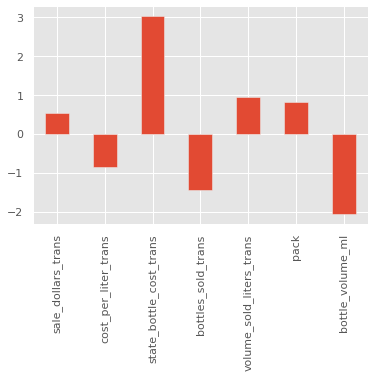

In [32]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(simplelogisticRegr.coef_[0],index=variable_names)
weights.plot(kind='bar')
plt.show()

### Support Vector Analysis
Look at the chosen support vectors for the classification task. Do these provide
any insight into the data? Explain. If you used stochastic gradient descent (and therefore did
not explicitly solve for support vectors), try subsampling your data to train the SVC model—
then analyze the support vectors from the subsampled dataset. 

In [0]:
#view support vectors
svm_clf.support_vectors_

In [0]:
# View indicies of support vectors
svm_clf.support_

This chooses all the misclassified items as a support vectors.

In [0]:
#view number of support vectors for each class
svm_clf.n_support_

We used 12,000 instances of Whiskey and Nonwhiskey to build our decision boundary.

In [0]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(model.coef_)
weights3 = pd.Series(model.coef_[0],index=X_train.columns)
weights3.plot(kind='bar')

Using our SVC model weights, we can see some consistency with our earlier analysis by ssing that state bottle cost and bottles solde are the strongest vectors in driving the decision boundaries for whiskies and non whiskies. From a negative perspective, the sale dollars and cost per liter are showing a negative relationship here. 

Next we are going to make a stratified shuffle split by plotting our SVC models.

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics as mt

# we want to predict the X and y data as follows:
if 'liquor_category_WHISKY' in data_final:
    y = data_final['liquor_category_WHISKY'].values # get the labels we want
    del data_final['liquor_category_WHISKY'] # get rid of the class label
    X = data_final.values # use everything else to predict!

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits = num_cv_iterations, 
                            test_size = 0.20, train_size = 0.80, random_state=1)

for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

    # for the SVM models 
    X_train_svc = X[train_indices]
    y_train_svc = y[train_indices]
    
    X_test_svc = X[test_indices]
    y_test_svc = y[test_indices]

Now that we established our new training and testing indicies, let's run it against our top performing SVC CLF model (the one that got 87% accuracy).

In [0]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = data_final.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()
#df_support['liquor_category_WHISKY'].head
data_final2 = data_final.copy()
df_support.loc[:,'liquor_category_WHISKY'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
data_final2.loc[:,'liquor_category_WHISKY'] = y # also add it back in for the original data
print(df_support.info())

Doing this granted us 738 non null values within what became our testing set. Using this, we will plot out the original vs the svm distribution of our state bottle cost trans, bottles sold trans, bottle volume ml and sale dollars trans, which was shown to be our strongest performing variables indicative of Whiskeys vs Non Whiskeys.

In [0]:
# now lets see the statistics of these attributes
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['liquor_category_WHISKY'])
df_grouped = data_final2.groupby(['liquor_category_WHISKY'])

# plot KDE of Different variables
vars_to_plot = ['state_bottle_cost_trans','bottles_sold_trans','bottle_volume_ml','sale_dollars_trans']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Whiskey','Not Whiskey'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Whiskey','Not Whiskey'])
    plt.title(v+' (Original)')

By plotting our data density graphs next to one another, we can see the separation between distributions of the original data sets next to our support vector data on key variables, on the whiskey classifier. 

What we are looking for here is the value of separation between what can be classified as a whiskey vs non whiskey (blue vs red lines). Since you can see that the separation on state bottle cost and the state bottle volume is more pronounced on the support vector model, this shows that they both play the most role in the prediction of whiskey. 

The other two variables, bottles sold and sale dollars, don't diverge as much between the original and SVM model, they are not as strong as predictors as the other two we discussed. And this is indicated on our weights we showed previously. 